# Introduction to Neural Networks

### Keras is needed to work on deep neural networks in Python. Here, keras runs on top of TensorFlow (other options: Microsoft Cognitive Toolkit, R, Theano, PlaidML). 

## Import necessary packages

In [ ]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Download and load the MNIST dataset

In [9]:
(X_train, Y_train), (x_test, y_test) = mnist.load_data()

In [10]:
# Check the data dimensions
print(X_train.shape)
print(Y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Let's look at our data format

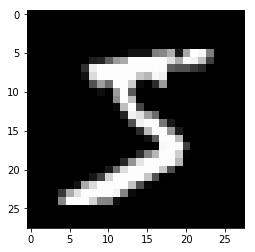

In [6]:
# An example of training data (image)
plt.imshow(X_train[0], cmap='gray')

In [17]:
# An example of training data (label)
Y_train[0]

5

## Preprocessing the image data (Converting the data from 2-D to 1-D)

## Preprocessing the labels (To categorical)

In [21]:
img_h, img_w = 28,28

X_train = X_train.reshape(60000, img_h*img_w)
x_test = x_test.reshape(10000, img_h*img_w)

In [22]:
X_train = X_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the data as it is always required in neural network models
# Scaling data to 0-1 instead of 0-255
X_train /= 255.0
x_test /= 255.0

In [23]:
# Turning labels to categorical
Y_train = to_categorical(Y_train, 10)
y_test = to_categorical(y_test, 10)
print(Y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Build a model

In [14]:
model = Sequential()

In [15]:
# Add hidden layers (fully connected nodes) / activation function / output layer
# No of hidden layers and no of neurons in the layers are experimental
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10,activation='softmax'))

## Compile the model

In [19]:
# Component of Keras
# Here, we configure the learning process
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Other optimzers: SGD, RMSprop
# Other loss functions: mean_squared_error

In [20]:
# To check our model and no of parameters
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Parameters calculation example - Input layer to first hidden layer 
# weight plus bias terms 
# (784*512) + 512 = 401920

## Train the model

In [25]:
results = model.fit(X_train, Y_train, epochs=3, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 96s - loss: 0.1016 - acc: 0.9681 - val_loss: 0.0849 - val_acc: 0.9745
Epoch 2/3
60000/60000 [==============================] - 99s - loss: 0.0632 - acc: 0.9798 - val_loss: 0.1018 - val_acc: 0.9710
Epoch 3/3
60000/60000 [==============================] - 95s - loss: 0.0493 - acc: 0.9842 - val_loss: 0.1115 - val_acc: 0.9681


## Accuracy of the model

### Plot the accuracy of the training and validation model

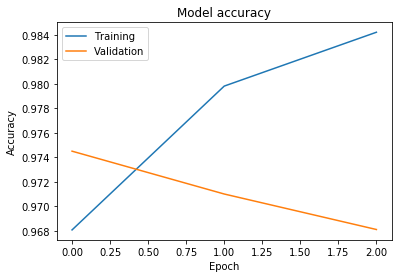

In [33]:
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

### Plot the loss function

Text(0.5,0,'Epoch')

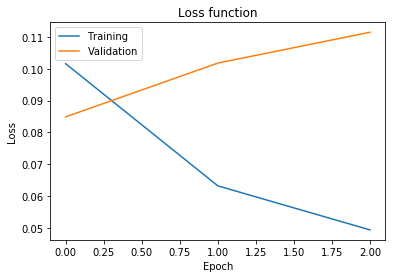

In [34]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])

plt.title('Loss function')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='best')
plt.xlabel('Epoch')

## Model accuracy for the validation dataset can also be checked with 'evaluate'

In [37]:
Val_accuracy = model.evaluate(x_test, y_test)
Val_accuracy

 9952/10000 [============================>.] - ETA: 0s

[0.11150416854638606, 0.9681]

In [38]:
# This accuracy is the same as seen above in epoch 3

### When fully connected neural networks is used to classify images, we get an accuracy of 96.81 %. It is not a bad start when trying out deep learning.

### In a different notebook, the use of convolution neural networks is shown.